# Hands on: Visualización y Clustering
## Minería de Datos 2021

### 1.- Selección y Descripción de Datos  

**1.1**- Descargue los 4 csv del aula virtual (mismo lugar donde encontró este archivo). Cada CSV contiene una lista de reproducción de canciones de spotify:
* Dinner: canciones para cenar o para poner en un restaurant
* Sleep: canciones que promueven el sueño
* Party: canciones ideales para el baile
* Workout: canciones para hacer ejercicio

Cada canción tiene un hash único para identificarla en spotify (id), un nombre y el artista correspondiente. El resto de las features (características) las puede ver directamente de la [página de desarrolladores de spotify](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)


**PREGUNTA**: Escriba aquí una tabla markdown con una explicación corta de cada feature.


**1.2**- Cargue cada playlist en un DataFrame pandas. Agregue una columna indicando al **playlist** que pertenece. Concatene todas las playlist en un solo dataframe. Verifique que su dataset tenga sentido.

**RECUERDE:**
* Elimine todos los samples (muestras) que tengan valores NaN (o impútelos si es valiente)
* Verifique que los índices del nuevo DataFrame estén correctos
* Imprima las estadísticas básicas de su dataset (media, varianza, máximos y mínimos) y su cabecera y cola para verificar el contenido

In [1]:
# ponga aquí su código
import pandas
import numpy as np

df=pandas.read_csv('party_audio.csv')
df=df.assign(Playlist='party')


workoutdf = pandas.read_csv('workout_audio.csv').dropna().assign(Playlist='workout');
sleepdf = pandas.read_csv('sleep_audio.csv').dropna().assign(Playlist='sleep');
dinnerdf = pandas.read_csv('dinner_audio.csv').dropna().assign(Playlist='dinner');
df = pandas.concat([df,sleepdf,dinnerdf,workoutdf])
df.index = range(df.shape[0])
df

,id,name,mfcc,scem,scom,srom,sbwm,tempo,rmse,Playlist
0,1,Aint My Fault.mp3,7.544702,2911.298160,19.847451,6540.168786,2904.537881,143.554688,8.705166,party
1,2,Alarm.mp3,6.000209,2423.260228,21.042379,5360.700918,2587.063482,143.554688,8.930219,party
2,3,Be As You Are - JordanXL Remix.mp3,6.259538,3215.164648,20.225918,6710.342757,2914.723038,172.265625,6.885521,party
3,4,Blow Your Mind (Mwah).mp3,7.872813,2670.846380,19.770658,5995.880410,2784.231148,107.666016,9.023844,party
4,5,Body Say.mp3,8.349560,2377.378428,20.028248,5226.343397,2594.219522,172.265625,9.701954,party
...,...,...,...,...,...,...,...,...,...,...
169,45,Wild for the Night.mp3,7.909813,2918.005158,19.835924,6597.643438,2891.844519,143.554688,11.055170,workout
170,46,'Till I Collapse.mp3,7.283616,2674.774992,19.876952,5288.601354,2482.279420,86.132812,8.857639,workout
171,47,A Milli.mp3,0.319868,2984.144801,21.843218,6185.670929,2719.480050,103.359375,7.212768,workout
172,48,All The Way Up (Remix).mp3,-1.639083,2541.987379,21.938482,5268.393143,2485.670784,117.453835,5.651819,workout


**PREGUNTA**: Si aprendieramos automáticamente la variable **playlist**, ¿qué problema de la vida real estariamos resolviendo? ¿Cree usted que será posible deducir esta variable a partir de los otros datos numéricos (hipótesis)?

### 2- Reducción de Dimensionalidad y Visualización

**2.1**- Compute la matriz de correlaciones del DataFrame (sólo valores numéricos) y presentela gráficamente como un mapa de calor. Haga una selección de 5 características que le parezcan interesantes y presente su matriz de covarianza en el mismo formato.

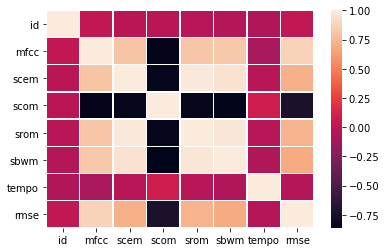

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(df.corr(), linewidth=0.3)
plt.show()

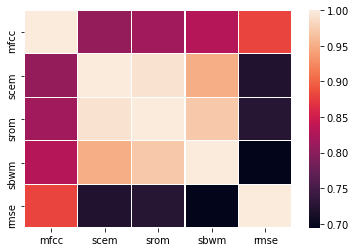

In [3]:
features=["mfcc","scem","srom","sbwm","rmse","Playlist"] 
feats = df.corr().loc[features[0:-1]][features[0:-1]]

ax = sns.heatmap(feats, linewidth=0.3)
plt.show()

**PREGUNTA**: Al hacer la selección usted aprendió algo de los datos (patrón, tendencia, repetición, etc.). Explique brevemente lo que usted conjetura o cree respecto a los datos.

**2.2**- Utilice seaborn para gráficar las proyecciones 2D de los datos en estas 5 dimensiones. Agregue la variable playlist como descriptor de color de los puntos.

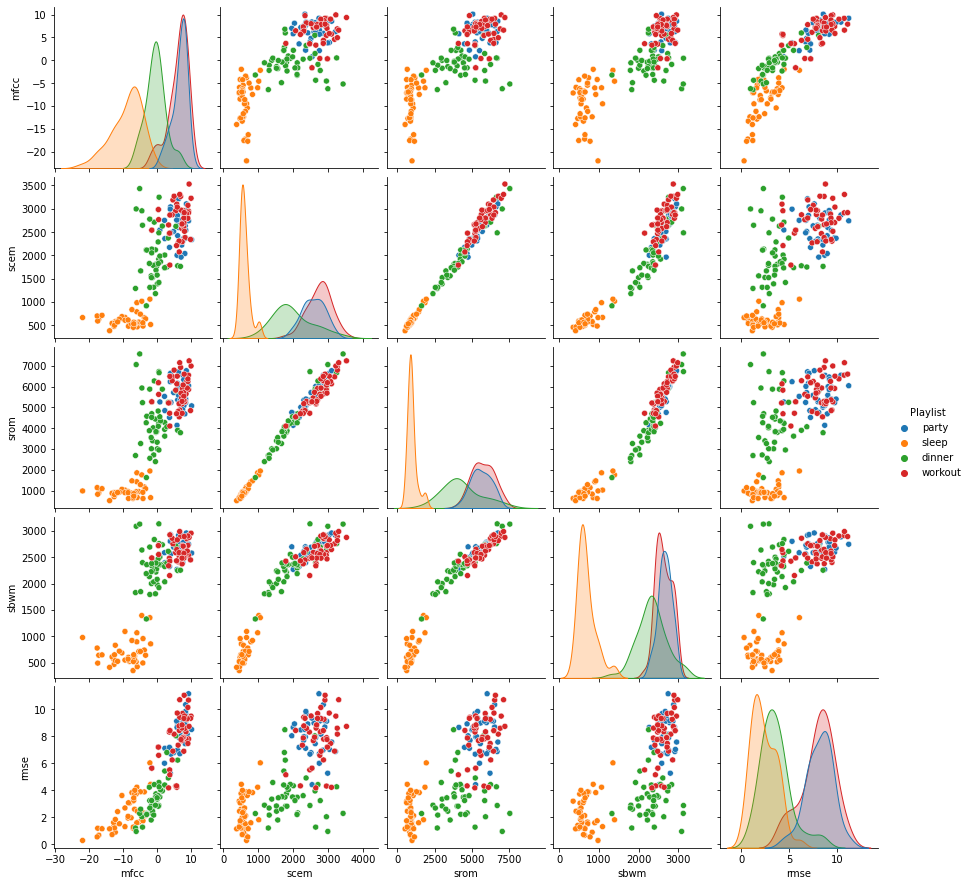

In [4]:
sns.pairplot(df[features],hue="Playlist")

**PREGUNTA**: ¿Puede sacar alguna conclusión ya de los datos seleccionados?

**2.3**- Aplique el Análisis de Componentes Principales considerando 5 componentes. Grafique las proyecciones 2D de las 5 dimensiones PCA con la variable playlist como descriptor de color de los puntos. Además, indique cuanto de la varianza se explica con estas 5 dimensiones.

In [11]:
df.columns

Index(['id', 'name', 'mfcc', 'scem', 'scom', 'srom', 'sbwm', 'tempo', 'rmse',
       'Playlist'],
      dtype='object')

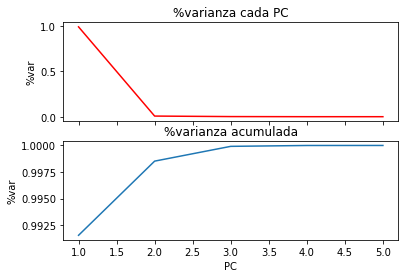

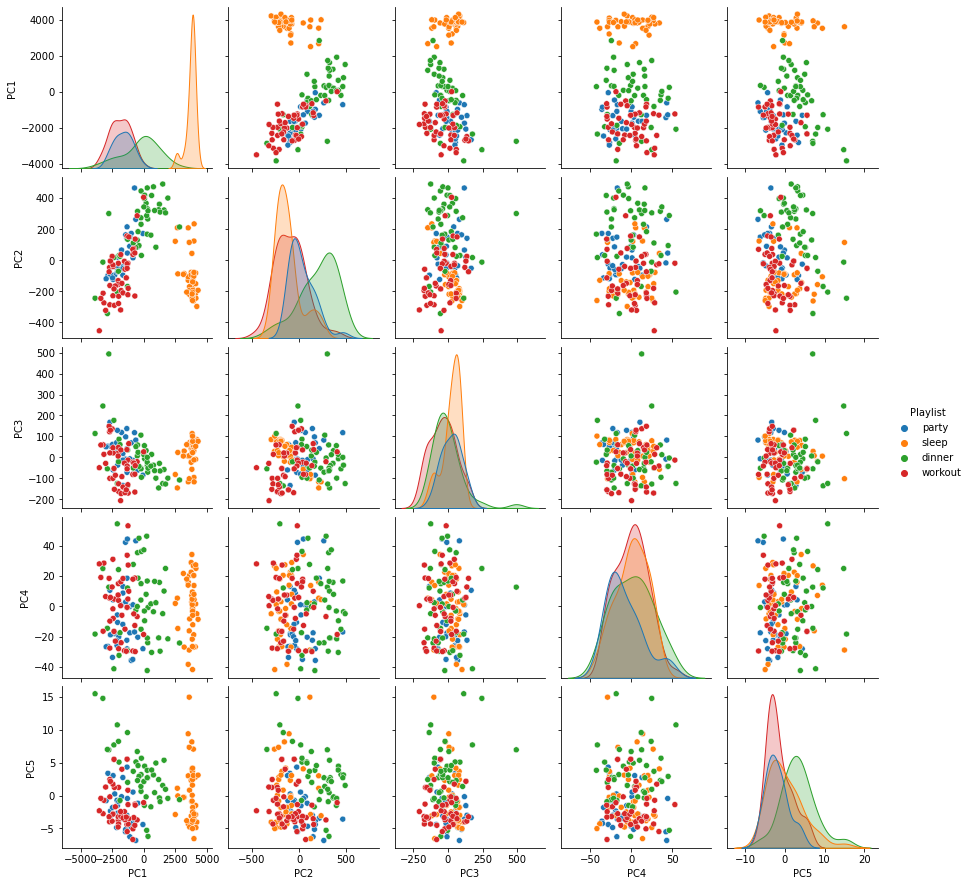

In [69]:
from sklearn import decomposition

features = ['mfcc', 'scem', 'scom', 'srom', 'sbwm', 'tempo', 'rmse']
featsdf = df[features]
#playlist_type = df["Playlist"]
#playlist_colors = {'party':'blue','workout':'orange','sleep':'green','dinner':'red'}

pca = decomposition.PCA(n_components=5)
pca.fit(featsdf)
featspca = pca.transform(featsdf)
var_perc_ratio = pca.explained_variance_ratio_

# projected coordinates
#fig, ax = plt.subplots(figsize = (10, 5))
#for playlst in np.unique(playlist_type):
#    mask = (playlist_type == playlst)
#    ax.scatter(featspca[mask][:, 0], featspca[mask][:, 1], label = playlst, c = playlist_colors[playlst], alpha = 0.5)

fig, axs = plt.subplots(2,1,sharex=True)

axs[0].plot(np.arange(1,6),var_perc_ratio,color="red")
axs[0].set_title("%varianza cada PC")
axs[0].set_ylabel("%var")
axs[1].plot(np.arange(1,6),var_perc_ratio.cumsum())
axs[1].set_title("%varianza acumulada")
axs[1].set_xlabel("PC")
axs[1].set_ylabel("%var")

#Calcular los vectores de PCA, NO es necesario hacerlo en el Hands On
#pero me puede servir en el taller.

#PCAdf = pandas.DataFrame(pca.components_)
#PCAdf.rename(index = {0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5'},inplace=True)
#PCAdf.rename(columns = {0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5'},inplace=True)

featspcadf = pandas.DataFrame(featspca)
featspcadf.rename(index = {0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5'},inplace=True)
featspcadf.rename(columns = {0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5'},inplace=True)
featspcadf["Playlist"] = df["Playlist"]
sns.pairplot(featspcadf,hue="Playlist")

**PREGUNTA**: ¿Cuál representación de 5 dimensiones tiene mayor potencial para clustering según usted? Fundamente y utilice esta representación desde ahora en adelante. 

**2.4**- Visualice la representación seleccionada con t-SNE de 2 dimensiones. Pruebe con al menos 3 valores de perplejidad.

In [6]:
# ponga aquí su código

**PREGUNTA**: ¿Considera usted que t-SNE ayuda en este caso? Indique cual es el efecto del parámetro perplejidad.

### 3- Clustering 
**3.1** Aplique al menos dos algoritmos de clustering. Si el algoritmo lo requiere, fije la cantidad de clusters a 4 (cantidad real de playlist). 

In [7]:
# ponga aquí su código

**PREGUNTA**: ¿Qué algoritmo se parece más adecuado cualitativamente? Seleccione este algoritmo para la siguiente pregunta. Tenga presente que comparar cuantitativamente clusters es complejo (muy posible!, pero aún no lo hemos visto).

**3.2** Revise cuales son y cambie fundadamente el/los parámetros del algoritmo.

In [8]:
# ponga aquí su código

**PREGUNTA**: fundamente su elección y explique si funcionó o no.

**3.3** Seleccione un representante adecuado para cada cluster, y haga una tabla con los nombres de las canciones y sus respectivos artistas.

In [9]:
# ponga aquí su código

**PREGUNTA FINAL**: cual es su veredicto (tesis) en contraste con lo escrito en el punto 1.2. 